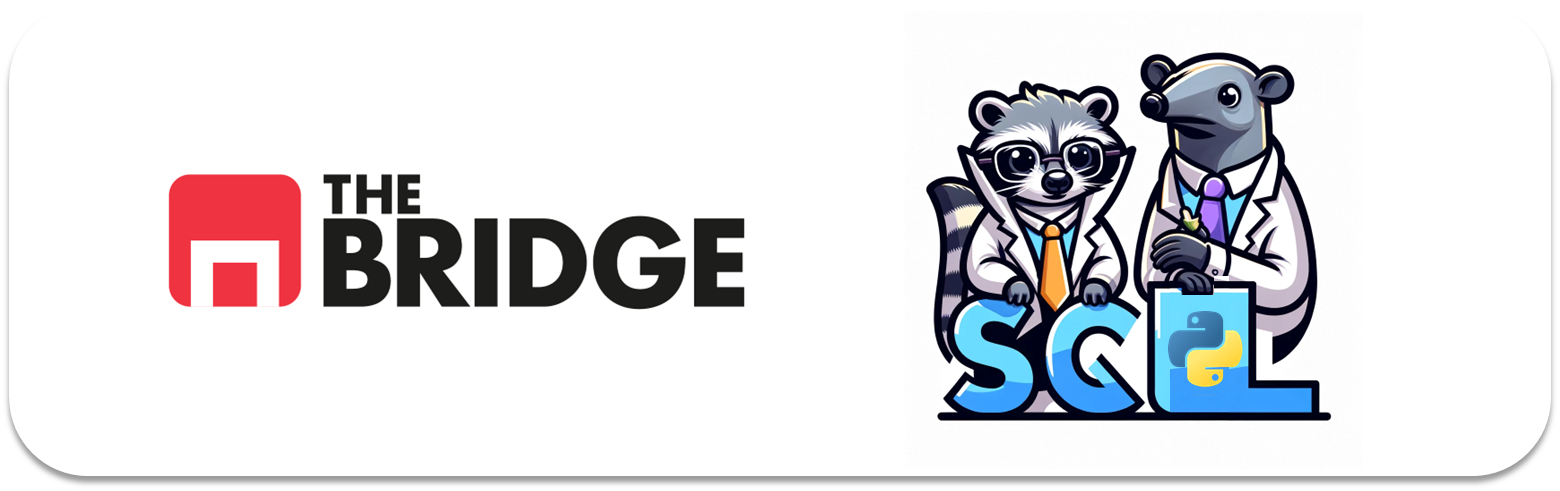

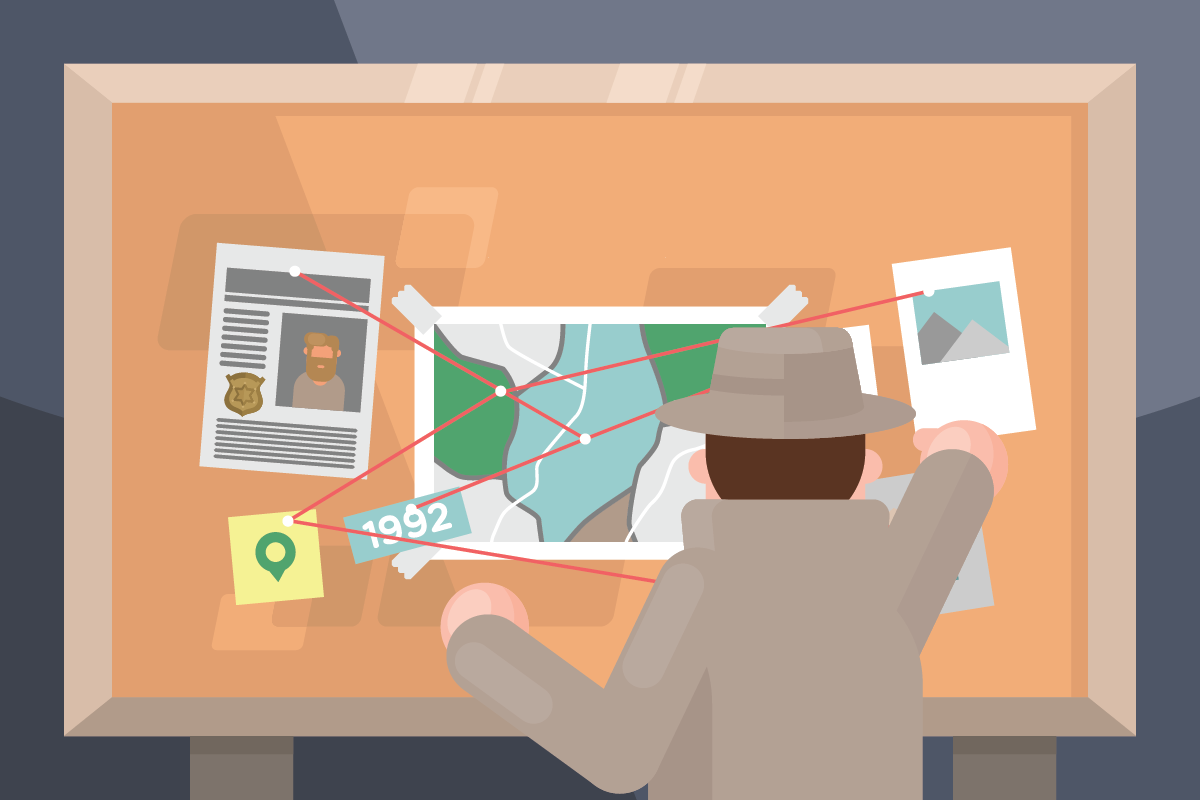

# Team Challenge SQL
## Parte 1: SQL Murder

### Introducción
Para este ejercicio os vais a ponerte la gabardina y el sombrero ya que tendréis que investigar un asesinato en *SQL City*. 

Aplicaréis los conecptos básicos de SQL y tendréis que manejaros con un modelo de datos, mientras resuelves un caso de asesinato :)

Este espectacular juego está creado por **Joon Park y Cathy He**, y podrás encontrar todos los detalles en [su web](http://mystery.knightlab.com).

Por un lado tendréis que resolver el caso a través de la propia web, donde encontrarás un intérprete de sentencias SQL interactivo. Tendréis que apuntar las queries y su resultado y cuando tengáis el caso resuelto, tendréis que armar un notebook en el que atacando a la base de datos que tenéis en el directorio data, resolváis el crimen con las mismas queries de la página web. 

### Entregable
Debéis nombrar un/a portavoz del equipo que cree un repositorio exclusivo para el Team Challenge, esta persona deberá hacer colaboradores del repositorio al resto del equipo.

Subiréis el notebook de la investigación al repositorio del equipo y haréis una pequeña presentación del resultado y vuestras pesquisas, junto con la segunda parte de este TC.

### Presentación
La presentación tendrá lugar en la sesión del Team Challenge del Sprint 7, la próxima semana.  

La presentación de ambas partes no debe superar los **15 minutos** de duración.

### Enunciado

<div align="center">
<blockquote>
<p><em>A crime has taken place and the detective needs your help.</em></p>
<p><em>The detective gave you the crime scene report, but you somehow lost it.</em></p>
<p><em>You vaguely remember that the crime was a <strong>murder</strong> that occurred sometime on <strong>Jan.15, 2018</strong> and that it took place in <strong>SQL City</strong>.</em></p>
<p><em>Start by retrieving the corresponding crime scene report from the police department's database.</em></p>
</blockquote>
</div>


### Modelo de datos
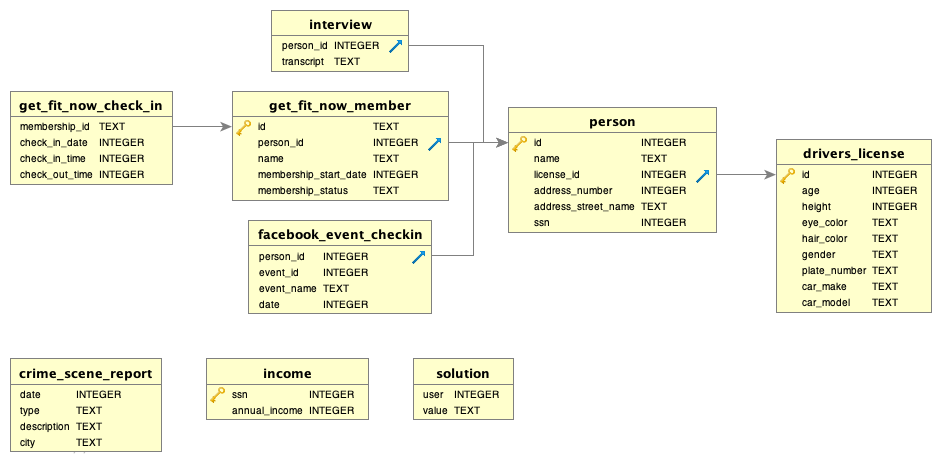




### Resolución

In [1]:
import sqlite3
import pandas as pd
pd.set_option('display.max_colwidth', None)  # para ver el texto completo

In [2]:
connection = sqlite3.connect("./data/sql-murder-mystery.db")
cursor_db = connection.cursor()
def from_query_to_df(query):
    cursor_db.execute(query)
    resultado = cursor_db.fetchall()
    columnas = [description[0] for description in cursor_db.description]

    df = pd.DataFrame(resultado,columns=columnas)

    return df

In [3]:
print("Lo que recordamos es que el crimen se cometió en SQL City, el 15 de Enero de 2018 y se trató de un asesinato.\n" \
"Con esta información vamos a investigar en el archivo de crímenes de la policía...\n")
city = "SQL City"
fecha = 20180115
tipo = "murder"
table_crimes = "crime_scene_report"
query = f'''SELECT * FROM {table_crimes} 
where date = {fecha} AND city LIKE "{city}" AND type LIKE "{tipo}"
'''
evento_df = from_query_to_df(query)
evento_df

Lo que recordamos es que el crimen se cometió en SQL City, el 15 de Enero de 2018 y se trató de un asesinato.
Con esta información vamos a investigar en el archivo de crímenes de la policía...



,date,type,description,city
0,20180115,murder,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave"".",SQL City


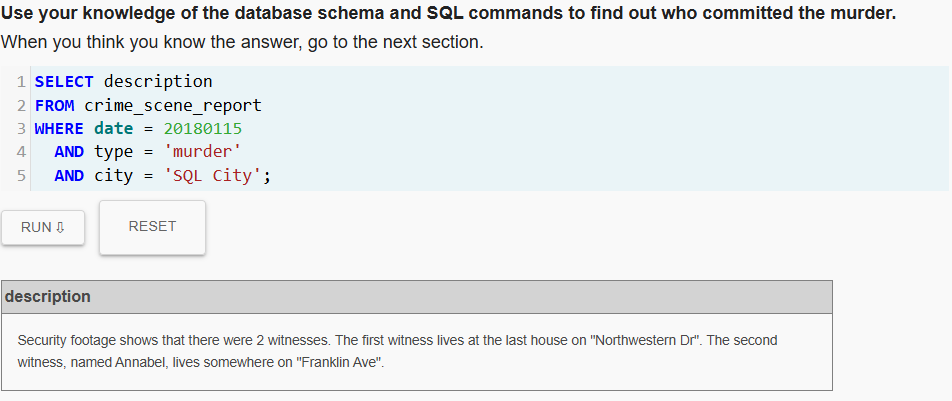

Nos da la pista de que uno vive en algun lugar parecido a "Franklin Ave" y se llama Annabel y el otro en "Northwestern Dr"

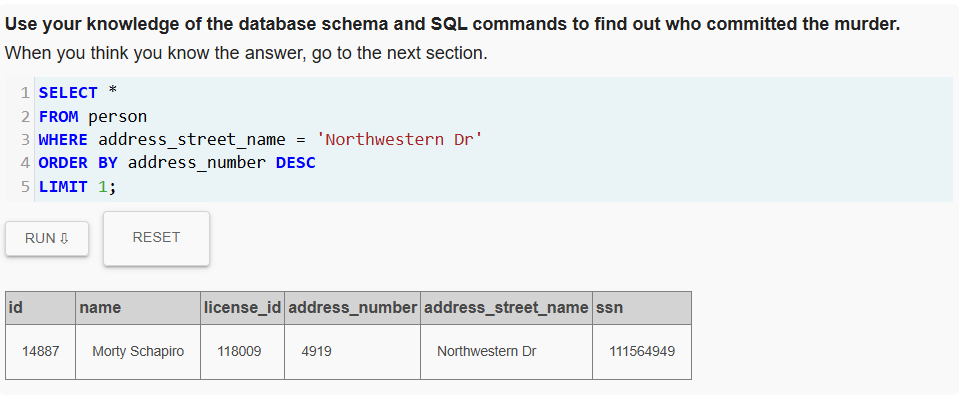

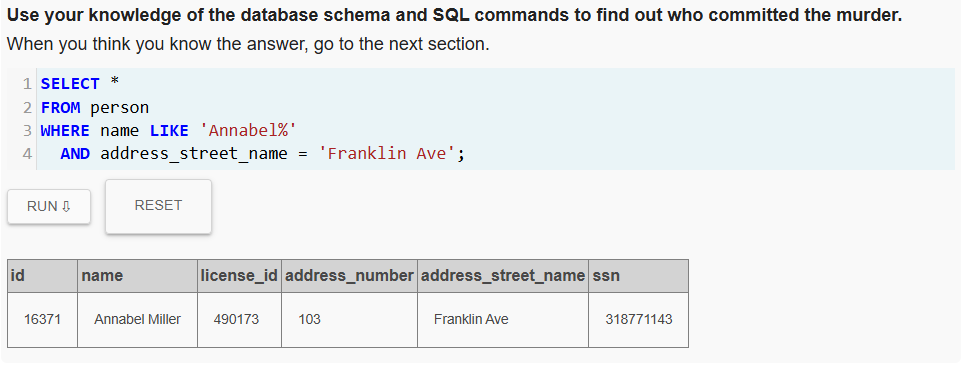

In [4]:
'''Security footage shows that there were 2 witnesses.
 The first witness lives at the last house on "Northwestern Dr".
   The second witness, named Annabel, lives somewhere on "Franklin Ave".
'''
print("Los registros nos dicen que se encontraron dos testigos en la escena del crimen y donde podemos localizar a estos testigos.\n" \
"Vamos a revisar el registro ciudadano de SQLCity para localizarles.\n")
street_witness_1 = "Northwestern Dr"
name_witness_2 = "Annabel"
street_witness_2 = "Franklin Ave"
table_citizens = 'person'
query = f'''
select * from {table_citizens}
WHERE address_street_name LIKE "%{street_witness_1}%"
AND address_number = (SELECT MAX(address_number) FROM {table_citizens} WHERE address_street_name LIKE "%{street_witness_1}%")
order by address_number DESC
'''
witness_1 = from_query_to_df(query)
# witness_1 = witness_1.iloc[0]
print("El  primer testigo tiene los siguientes datos: \n")
display(witness_1)

query = f'''
select * from {table_citizens}
WHERE address_street_name LIKE "%{street_witness_2}%"
AND name LIKE "%{name_witness_2}%"
'''
witness_2 = from_query_to_df(query)
print("Nuestro segundo testigo está localizado, estos son sus datos: \n")
display(witness_2)


Los registros nos dicen que se encontraron dos testigos en la escena del crimen y donde podemos localizar a estos testigos.
Vamos a revisar el registro ciudadano de SQLCity para localizarles.

El  primer testigo tiene los siguientes datos: 



,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


Nuestro segundo testigo está localizado, estos son sus datos: 



,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


Hacemos el select de los testigos

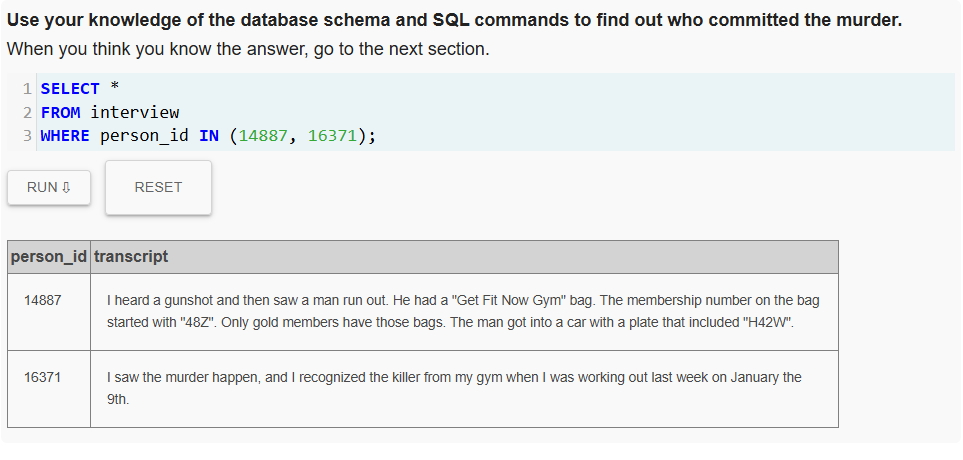

In [5]:
print("¡Bien!, ya tenemos la información personal de los testigos y su identificación.\n" \
"Podemos ir al registro de interrogatorios y extraer sus declaraciones.\n")

id_witness_1 = witness_1.iloc[0].id
id_witness_2 = witness_2.iloc[0].id
table_interview = "interview"

query = f'''SELECT * FROM {table_interview} WHERE person_id = {id_witness_1}
'''
interview_1 = from_query_to_df(query)
print(f"Esta es la declaración del primer testigo {witness_1.iloc[0]["name"]}\n{interview_1.iloc[0].transcript}\n")

query = f'''SELECT * FROM {table_interview} WHERE person_id = {id_witness_2}
'''
interview_2 = from_query_to_df(query)
print(f"Esta es la declaración de nuestra segunda testigo {witness_2.iloc[0]["name"]}\n{interview_2.iloc[0].transcript}\n")

¡Bien!, ya tenemos la información personal de los testigos y su identificación.
Podemos ir al registro de interrogatorios y extraer sus declaraciones.

Esta es la declaración del primer testigo Morty Schapiro
I heard a gunshot and then saw a man run out. He had a "Get Fit Now Gym" bag. The membership number on the bag started with "48Z". Only gold members have those bags. The man got into a car with a plate that included "H42W".

Esta es la declaración de nuestra segunda testigo Annabel Miller
I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th.



Ponemos que el person_id este entre esos valores porqué son los de los testigos, 14887 es el de Morty y el 16731 es el de Annabel

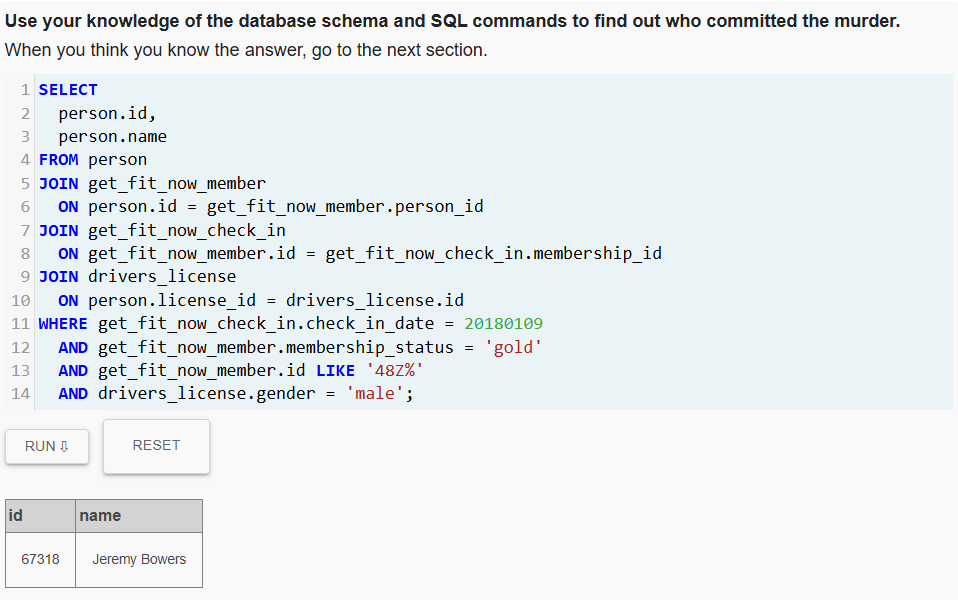

In [6]:
# Ahora con la información de los testigos consultaremos en la tabla de usuarios del gimnasio
print(f'''Basándonos en la declaración de {witness_1.iloc[0]["name"]}, que nos parece más detallada y precisa.\n
Vamos a pedir los registros de los miembros del gimnasio.\n''')
membresia = "gold"
id_socio = "48Z%"
matricula = "%H42W%"
fecha_acceso = ''
table_gym_members = "get_fit_now_member"
query = f'''SELECT * FROM {table_gym_members} 
WHERE membership_status = "{membresia}" AND id LIKE "{id_socio}"
'''
sospechosos_df = from_query_to_df(query)
print("Tenemos dos sospechosos que encajan con lo que nos dijo el primer testigo:\n")
sospechosos_df

Basándonos en la declaración de Morty Schapiro, que nos parece más detallada y precisa.

Vamos a pedir los registros de los miembros del gimnasio.

Tenemos dos sospechosos que encajan con lo que nos dijo el primer testigo:



,id,person_id,name,membership_start_date,membership_status
0,48Z7A,28819,Joe Germuska,20160305,gold
1,48Z55,67318,Jeremy Bowers,20160101,gold


En esta consulta que es mas compleja, explicamos el porque se hace esto:
Segun las pistas anteriores, deducimos que hombre, que el check in es el 9 de enero de 2018, el estatus de su membresia es de oro y que el ID de su membresia empieza por 48Z

Hacemos tantos JOINS a diferentes tablas porqué los datos que nos ha dado la última consulta esta en diferentes tablas, por ejemplo, la de la membresia esta en get_fit_now_check_in, el genero del usuario en el carnet de conducir, asi con todos los datos que nos ha proporcionado la última consulta

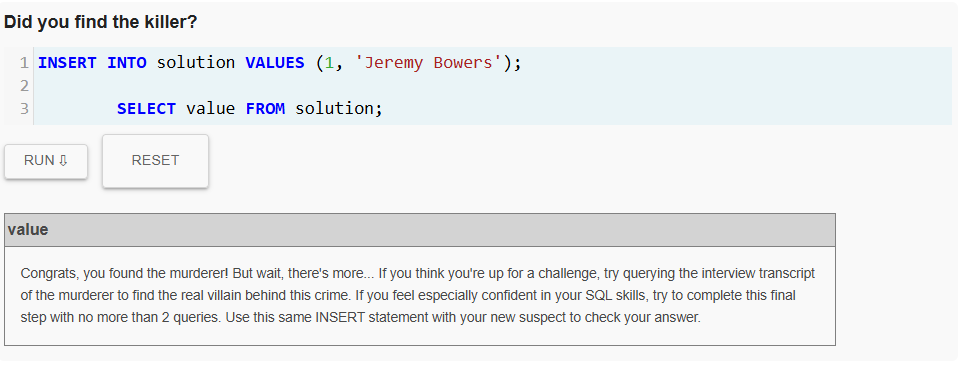

In [8]:
print("Con los datos del gimnasio y la información aportada sobre el vehículo, podemos cotejar la matricula\n" \
"con el registro de conductores y localizar al propietario del vehículo, pudiendo descartar a un sospechoso.")
table_drivers = "drivers_license"
query = f'''SELECT p.*
FROM {table_citizens} as p
JOIN {table_drivers} as d ON p.license_id = d.id
WHERE d.plate_number LIKE "{matricula}"
AND p.id IN (SELECT person_id FROM {table_gym_members} 
WHERE membership_status = "{membresia}" AND id LIKE "{id_socio}")
'''
sospechoso_final = from_query_to_df(query)
print("Nuestro sospechoso final es:\n")
display(sospechoso_final)

Con los datos del gimnasio y la información aportada sobre el vehículo, podemos cotejar la matricula
con el registro de conductores y localizar al propietario del vehículo, pudiendo descartar a un sospechoso.
Nuestro sospechoso final es:



,id,name,license_id,address_number,address_street_name,ssn
0,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


Hemos conseguido encontrar al asesino